In [1]:
import pandas as pd
import numpy as np
from pydataset import data
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=sns.load_dataset('healthexp')

In [13]:
df

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


### How has health expenditure (Spending_USD) changed over the years in different countries?

<Figure size 1200x800 with 0 Axes>

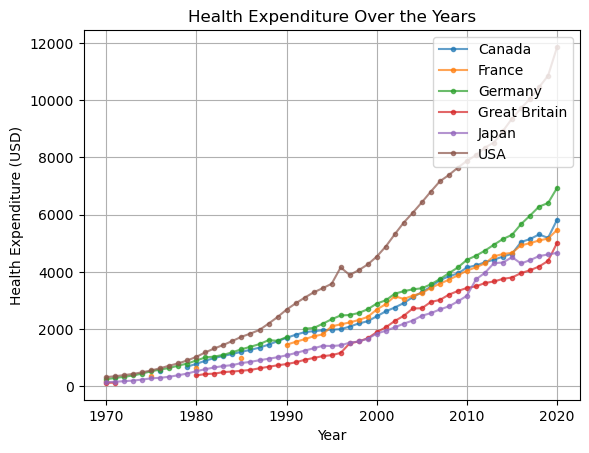

In [21]:
grouped_data = df.groupby(['Year', 'Country'])['Spending_USD'].mean().reset_index()
pivot_data = grouped_data.pivot(index='Country', columns='Year', values='Spending_USD')
plt.figure(figsize=(12, 8))
pivot_data.T.plot(marker='.', linestyle='-', alpha=0.7)
plt.title('Health Expenditure Over the Years')
plt.xlabel('Year')
plt.ylabel('Health Expenditure (USD)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


### What is the relationship between health expenditure and life expectancy?

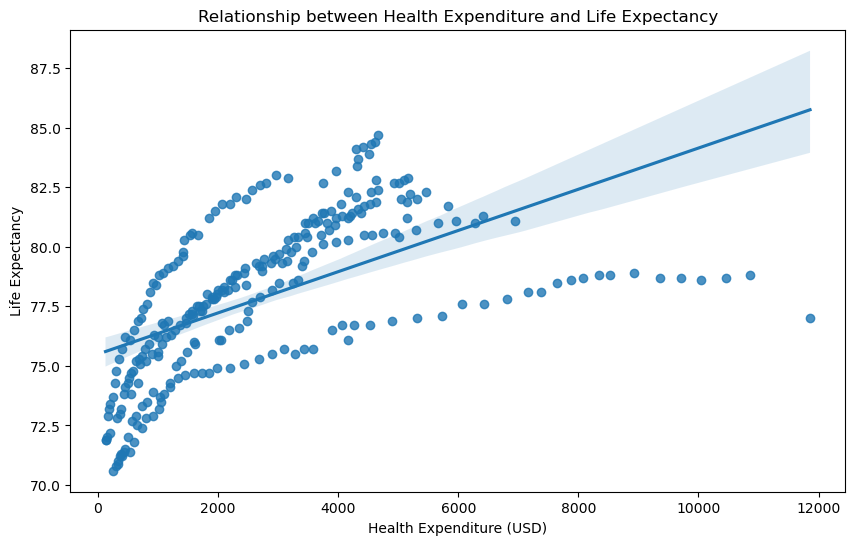

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Spending_USD', y='Life_Expectancy')
plt.title('Relationship between Health Expenditure and Life Expectancy')
plt.xlabel('Health Expenditure (USD)')
plt.ylabel('Life Expectancy')
plt.show()

In [23]:
correlation = df['Spending_USD'].corr(df['Life_Expectancy'])
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.5794304588530952


### Which countries have the highest and lowest health expenditures?

In [25]:
sorted_data = df.sort_values('Spending_USD', ascending=False)

country_highest = sorted_data.iloc[0]['Country']
country_lowest = sorted_data.iloc[-1]['Country']
print(f"Country with the highest health expenditure: {country_highest}")
print(f"Country with the lowest health expenditure: {country_lowest}")

Country with the highest health expenditure: USA
Country with the lowest health expenditure: Great Britain


### Can we identify any trends or patterns in health expenditure across different regions or continents?

In [31]:
df

,Year,Country,Spending_USD,Life_Expectancy,Continent
0,1970,Germany,252.311,70.6,Europe
1,1970,France,192.143,72.2,Europe
2,1970,Great Britain,123.993,71.9,Europe
3,1970,Japan,150.437,72.0,Asia
4,1970,USA,326.961,70.9,North America
...,...,...,...,...,...
269,2020,Germany,6938.983,81.1,Europe
270,2020,France,5468.418,82.3,Europe
271,2020,Great Britain,5018.700,80.4,Europe
272,2020,Japan,4665.641,84.7,Asia


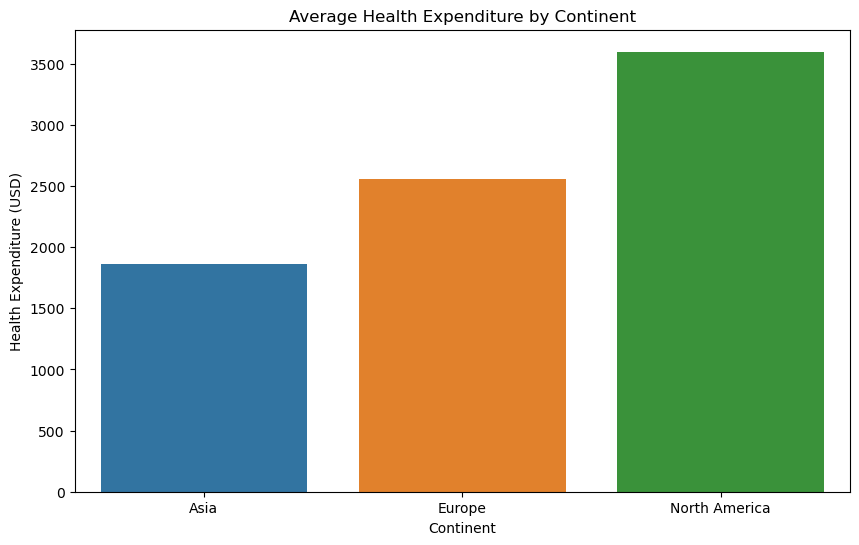

In [30]:
df['Continent'] = df['Country'].map({'Germany': 'Europe', 'France': 'Europe','Great Britain': 'Europe', 'Japan': 'Asia','USA': 'North America','Canada': 'North America'})

grouped_data = df.groupby('Continent')['Spending_USD'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Continent', y='Spending_USD')
plt.title('Average Health Expenditure by Continent')
plt.xlabel('Continent')
plt.ylabel('Health Expenditure (USD)')
plt.show()


### How has Life Expectancy changed over the years in different countries?

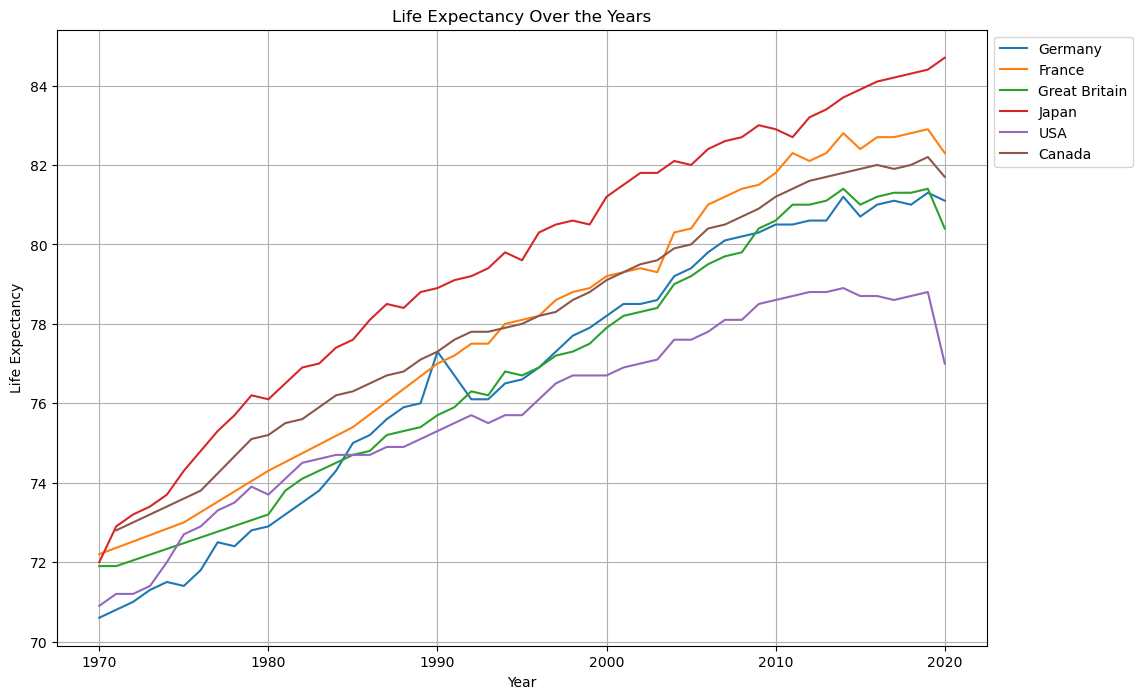

In [32]:
countries = df['Country'].unique()

plt.figure(figsize=(12, 8))
for country in countries:
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life_Expectancy'], label=country)

plt.title('Life Expectancy Over the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


### How has Life Expectancy changed over the years in different continents?

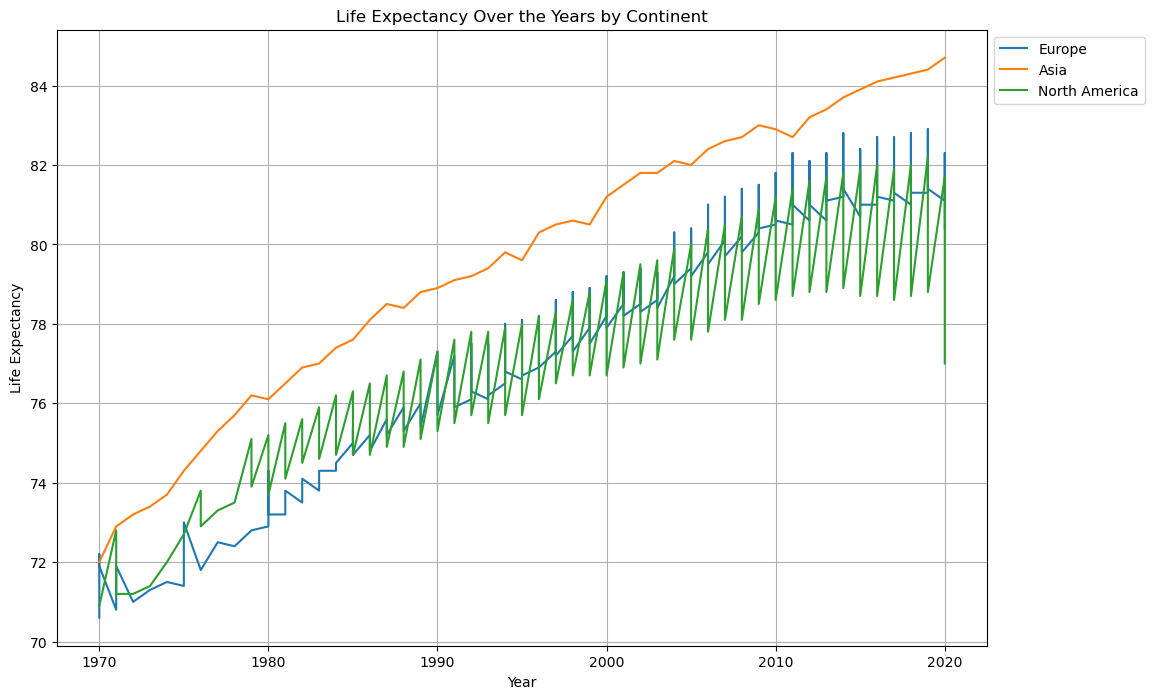

In [36]:
df['Continent'] = df['Country'].map({'Germany': 'Europe', 'France': 'Europe','Great Britain': 'Europe', 'Japan': 'Asia','USA': 'North America','Canada': 'North America'})
continents = df['Continent'].unique()
plt.figure(figsize=(12, 8))
for continent in continents:
    continent_data = df[df['Continent'] == continent]
    plt.plot(continent_data['Year'], continent_data['Life_Expectancy'], label=continent)

plt.title('Life Expectancy Over the Years by Continent')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()